In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
data=pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.isnull().sum()

SAT    0
GPA    0
dtype: int64

In [5]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [6]:
data.tail(10)

,SAT,GPA
74,2021,3.61
75,2015,3.62
76,1997,3.64
77,2020,3.65
78,1843,3.71
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


In [7]:
data.size

168

In [8]:
data.shape

(84, 2)

In [9]:
data.info

<bound method DataFrame.info of      SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]>

In [10]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [11]:
x=data.iloc[:,:-1].values

In [12]:
x

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

In [13]:
y=data.iloc[:,-1].values

In [14]:
y

array([2.4 , 2.52, 2.54, 2.74, 2.83, 2.91, 3.  , 3.  , 3.01, 3.01, 3.02,
       3.07, 3.08, 3.08, 3.12, 3.17, 3.17, 3.17, 3.17, 3.19, 3.19, 3.19,
       3.2 , 3.21, 3.24, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.29,
       3.29, 3.29, 3.31, 3.32, 3.34, 3.37, 3.37, 3.37, 3.38, 3.38, 3.39,
       3.39, 3.4 , 3.4 , 3.4 , 3.41, 3.41, 3.41, 3.42, 3.42, 3.42, 3.44,
       3.47, 3.47, 3.47, 3.47, 3.48, 3.49, 3.49, 3.5 , 3.51, 3.51, 3.52,
       3.52, 3.54, 3.58, 3.58, 3.59, 3.59, 3.6 , 3.6 , 3.61, 3.62, 3.64,
       3.65, 3.71, 3.71, 3.71, 3.73, 3.76, 3.81])

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [16]:
y_train

array([2.74, 3.58, 3.48, 3.  , 3.29, 3.42, 3.49, 2.83, 3.17, 3.17, 3.37,
       2.91, 3.64, 3.38, 2.4 , 3.29, 3.28, 3.07, 3.5 , 3.21, 3.02, 3.28,
       3.42, 3.71, 2.52, 3.29, 3.59, 3.12, 3.47, 3.19, 3.28, 3.42, 3.41,
       3.24, 3.31, 3.17, 3.73, 3.76, 3.19, 3.71, 3.28, 3.34, 3.4 , 3.37,
       3.52, 3.47, 3.08, 3.59, 3.32, 3.19, 3.01, 3.71, 3.54, 3.51, 3.4 ,
       3.39])

In [17]:
x_train

array([[1685],
       [1861],
       [1891],
       [1764],
       [1855],
       [1907],
       [1964],
       [1693],
       [1872],
       [1674],
       [1777],
       [1670],
       [1997],
       [1966],
       [1714],
       [1880],
       [2020],
       [1775],
       [1893],
       [1687],
       [1735],
       [1934],
       [1634],
       [1936],
       [1664],
       [1775],
       [1778],
       [1773],
       [1953],
       [1786],
       [1794],
       [1855],
       [1979],
       [1974],
       [1849],
       [1842],
       [1987],
       [1962],
       [1761],
       [1843],
       [1826],
       [1954],
       [1824],
       [1831],
       [1832],
       [1781],
       [1735],
       [1933],
       [1808],
       [1722],
       [1850],
       [1810],
       [1934],
       [1893],
       [1956],
       [1990]], dtype=int64)

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred=reg.predict(x_test)

In [20]:
y_pred

array([3.18816203, 3.34839377, 3.07633364, 3.24324169, 3.01123949,
       3.37176089, 3.17314031, 3.12306789, 3.21820548, 3.22655089,
       3.45855308, 3.09302444, 3.32335756, 3.60710125, 3.16479491,
       3.27495422, 3.59875585, 3.46356033, 3.33504112, 3.60877033,
       3.65717367, 3.25325617, 3.32335756, 3.64215195, 3.38511354,
       3.4485386 , 3.53199263, 3.17981663])

In [21]:
x_test

array([[1769],
       [1865],
       [1702],
       [1802],
       [1663],
       [1879],
       [1760],
       [1730],
       [1787],
       [1792],
       [1931],
       [1712],
       [1850],
       [2020],
       [1755],
       [1821],
       [2015],
       [1934],
       [1857],
       [2021],
       [2050],
       [1808],
       [1850],
       [2041],
       [1887],
       [1925],
       [1975],
       [1764]], dtype=int64)

In [22]:
y_test


array([3.28, 3.37, 3.39, 3.41, 3.2 , 3.44, 2.54, 3.47, 3.28, 3.01, 3.58,
       3.08, 3.52, 3.65, 3.17, 3.28, 3.62, 3.6 , 3.41, 3.61, 3.81, 3.49,
       3.38, 3.51, 3.47, 3.4 , 3.6 , 3.  ])

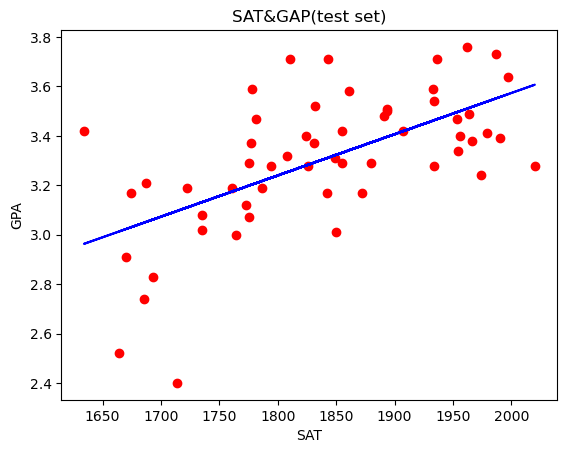

In [28]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.title("SAT&GAP(test set)")
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

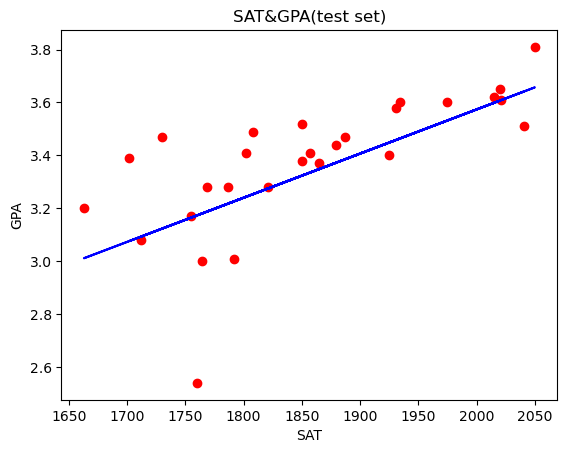

In [25]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title("SAT&GPA(test set)")
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()